Top 5 empleados con más antigüedad:
    TX_NOMBRE TX_APELLIDO1 TX_APELLIDO2  ANTIGUEDAD
0        Ana       García        Pérez   10.258727
19    Daniel     Iglesias      Navarro    9.954825
1       Luis     Martínez      Sánchez    9.062286
10    Isabel      Serrano         Ruiz    8.867899
2      María        López    Fernández    7.906913


C:\Users\jalopez\AppData\Local\Temp\ipykernel_17472\3032274339.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  empleados_df = pd.read_sql("SELECT * FROM em_empleados", mydb)
C:\Users\jalopez\AppData\Local\Temp\ipykernel_17472\3032274339.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  proyectos_df = pd.read_sql("SELECT * FROM pr_proyectos", mydb)
C:\Users\jalopez\AppData\Local\Temp\ipykernel_17472\3032274339.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  empleados_proyectos_df = pd.read_sql("SELECT * FROM pr_

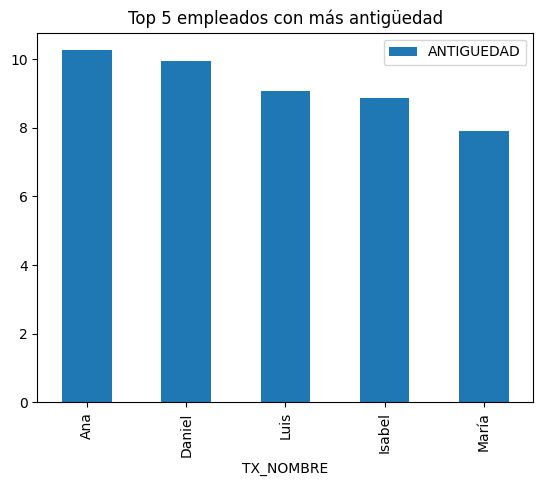


Top 5 empleados más recientes:
    TX_NOMBRE TX_APELLIDO1 TX_APELLIDO2     F_ALTA
17    Héctor       Santos         Díaz 2024-09-01
9     Carlos      Navarro     Iglesias 2024-07-20
16    Carmen        Vidal         Ruiz 2023-07-01
8      Sofía       Torres        Muñoz 2023-05-01
15    Adrián          Gil      Sánchez 2022-05-01


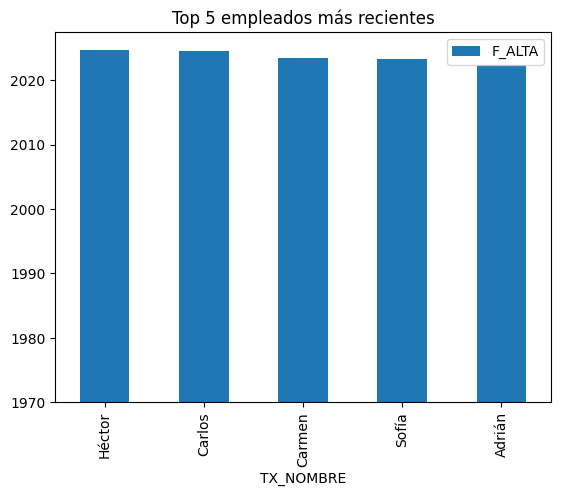

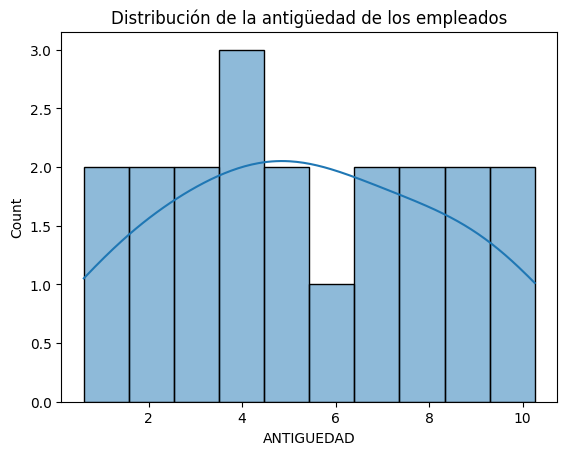

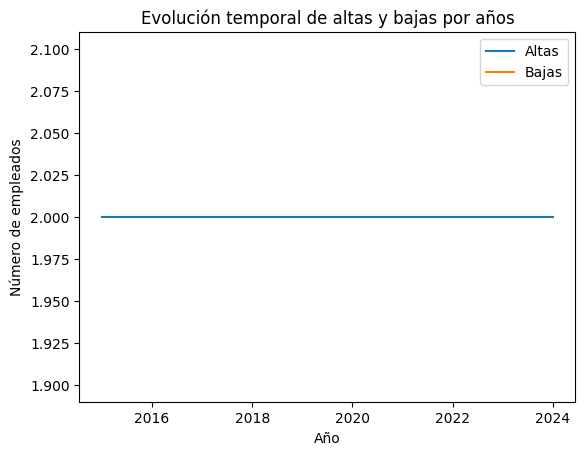


Años de mayor crecimiento:
 F_ALTA
2015    0.0
2016    0.0
Name: count, dtype: float64

Años de mayor decrecimiento:
 Series([], Name: count, dtype: float64)


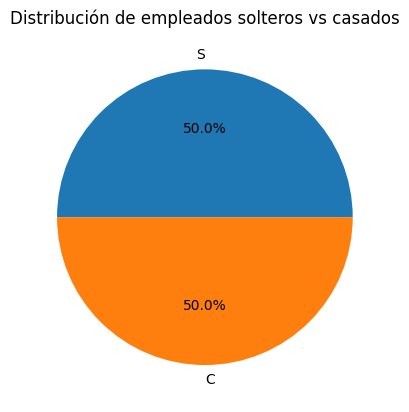

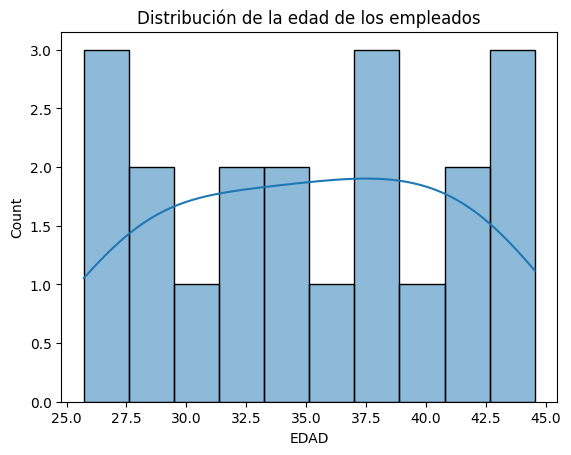


Edad media: 35.30
Desviación típica de la edad: 5.90

Proyectos activos: 0
Proyectos finalizados: 20
Proyectos total: 20


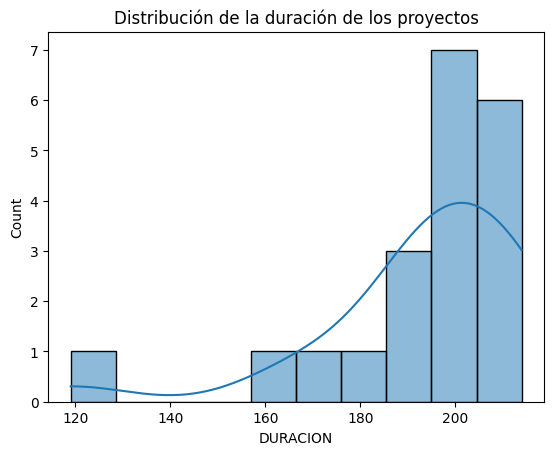

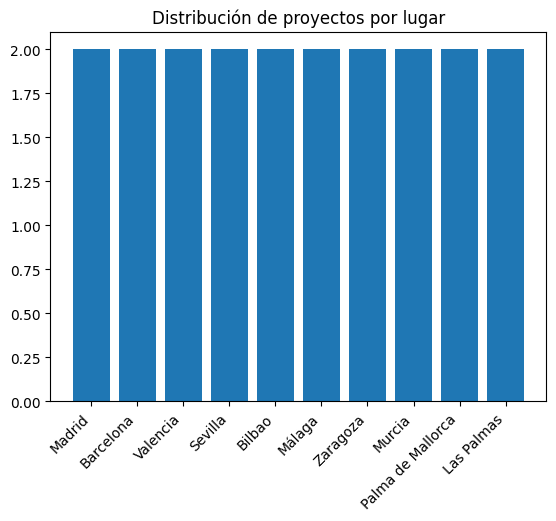

Uno o ambos DataFrames (empleados_proyectos o proyectos) están vacíos.


In [20]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Conexión a la base de datos MySQL
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="bdd_proyecto"
)

# Leer las tablas en DataFrames de pandas
empleados_df = pd.read_sql("SELECT * FROM em_empleados", mydb)
proyectos_df = pd.read_sql("SELECT * FROM pr_proyectos", mydb)
empleados_proyectos_df = pd.read_sql("SELECT * FROM pr_empleados_proyecto", mydb)

# Cerrar la conexión
mydb.close()

# Convertir las columnas de fecha a tipo datetime
try:
    empleados_df['F_NACIMIENTO'] = pd.to_datetime(empleados_df['F_NACIMIENTO'])
    empleados_df['F_ALTA'] = pd.to_datetime(empleados_df['F_ALTA'])
    empleados_df['F_BAJA'] = pd.to_datetime(empleados_df['F_BAJA'])
    proyectos_df['F_INICIO'] = pd.to_datetime(proyectos_df['F_INICIO'])
    proyectos_df['F_FIN'] = pd.to_datetime(proyectos_df['F_FIN'])
    proyectos_df['F_BAJA'] = pd.to_datetime(proyectos_df['F_BAJA'])
    empleados_proyectos_df['F_ALTA'] = pd.to_datetime(empleados_proyectos_df['F_ALTA'])
except KeyError as e:
    print(f"Error: Columna faltante en DataFrame: {e}")
    exit()

# 1. Análisis de Empleados
if not empleados_df.empty:
    # Calcular la edad de los empleados
    now = pd.to_datetime('now')
    empleados_df['EDAD'] = (now - empleados_df['F_NACIMIENTO']).dt.days / 365.25

    # Calcular la antigüedad de los empleados
    empleados_df['ANTIGUEDAD'] = (now - empleados_df['F_ALTA']).dt.days / 365.25

    # Top 5 empleados con más antigüedad
    top_antiguedad = empleados_df.nlargest(5, 'ANTIGUEDAD')[['TX_NOMBRE', 'TX_APELLIDO1', 'TX_APELLIDO2', 'ANTIGUEDAD']]
    print("Top 5 empleados con más antigüedad:\n", top_antiguedad)
    top_antiguedad.plot(kind='bar', x='TX_NOMBRE', y='ANTIGUEDAD')
    plt.title('Top 5 empleados con más antigüedad')
    plt.show()

    # Top 5 empleados más recientes
    top_recientes = empleados_df.sort_values(by='F_ALTA', ascending=False).head(5)[['TX_NOMBRE', 'TX_APELLIDO1', 'TX_APELLIDO2', 'F_ALTA']]
    print("\nTop 5 empleados más recientes:\n", top_recientes)
    top_recientes.plot(kind='bar', x='TX_NOMBRE', y='F_ALTA')
    plt.title('Top 5 empleados más recientes')
    plt.show()

    # Distribución de la antigüedad de los empleados
    plt.figure()
    sns.histplot(empleados_df['ANTIGUEDAD'], bins=10, kde=True)
    plt.title('Distribución de la antigüedad de los empleados')
    plt.show()

    # Evolución temporal de altas y bajas por años
    altas_por_anio = empleados_df['F_ALTA'].dt.year.value_counts().sort_index()
    bajas_por_anio = empleados_df['F_BAJA'].dt.year.value_counts().sort_index()

    plt.figure()
    plt.plot(altas_por_anio.index, altas_por_anio.values, label='Altas')
    plt.plot(bajas_por_anio.index, bajas_por_anio.values, label='Bajas')
    plt.title('Evolución temporal de altas y bajas por años')
    plt.xlabel('Año')
    plt.ylabel('Número de empleados')
    plt.legend()
    plt.show()

    # Años de mayor crecimiento/decrecimiento
    crecimiento = altas_por_anio.diff().fillna(0)
    decrecimiento = bajas_por_anio.diff().fillna(0)
    print("\nAños de mayor crecimiento:\n", crecimiento.nlargest(2))
    print("\nAños de mayor decrecimiento:\n", decrecimiento.nsmallest(2))

    # Distribución de empleados solteros vs casados
    estado_civil_counts = empleados_df['CX_EDOCIVIL'].value_counts()
    plt.figure()
    plt.pie(estado_civil_counts, labels=estado_civil_counts.index, autopct='%1.1f%%')
    plt.title('Distribución de empleados solteros vs casados')
    plt.show()

    # Distribución de la edad de los empleados
    plt.figure()
    sns.histplot(empleados_df['EDAD'], bins=10, kde=True)
    plt.title('Distribución de la edad de los empleados')
    plt.show()

    # Edad media y desviación típica
    edad_media = empleados_df['EDAD'].mean()
    edad_desviacion = empleados_df['EDAD'].std()
    print(f"\nEdad media: {edad_media:.2f}")
    print(f"Desviación típica de la edad: {edad_desviacion:.2f}")
else:
    print("DataFrame de empleados vacío.")

# 2. Análisis de Proyectos
if not proyectos_df.empty:
    # Número de proyectos activos, finalizados y total
    proyectos_activos = proyectos_df[proyectos_df['F_FIN'].isnull()].shape[0]
    proyectos_finalizados = proyectos_df[proyectos_df['F_FIN'].notnull()].shape[0]
    proyectos_total = proyectos_df.shape[0]
    print(f"\nProyectos activos: {proyectos_activos}")
    print(f"Proyectos finalizados: {proyectos_finalizados}")
    print(f"Proyectos total: {proyectos_total}")

    # Distribución de la duración de los proyectos
    proyectos_df['DURACION'] = (proyectos_df['F_FIN'] - proyectos_df['F_INICIO']).dt.days
    plt.figure()
    sns.histplot(proyectos_df['DURACION'].dropna(), bins=10, kde=True)
    plt.title('Distribución de la duración de los proyectos')
    plt.show()

    # Distribución de proyectos por lugar
    lugar_counts = proyectos_df['TX_LUGAR'].value_counts()
    plt.figure()
    plt.bar(lugar_counts.index, lugar_counts.values)
    plt.title('Distribución de proyectos por lugar')
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print("DataFrame de proyectos vacío.")

# 3. Análisis de Proyectos y Empleados
if not empleados_proyectos_df.empty and not proyectos_df.empty:
    # Número de empleados por proyecto (corregido)
    proyectos_empleados_df = pd.merge(empleados_proyectos_df, proyectos_df, on='ID_PROYECTO')
    empleados_por_proyecto = proyectos_empleados_df.groupby('TX_DESCRIPCIÓN')['ID_EMPLEADO'].count()

    # Crear el gráfico de barras
    plt.figure()
    plt.bar(empleados_por_proyecto.index, empleados_por_proyecto.values)
    plt.xlabel('Nombre del proyecto')
    plt.ylabel('Número de empleados')
    plt.title('Número de empleados por proyecto')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Imprimir los resultados en formato de tabla
    print("Número de empleados por proyecto:")
    print(empleados_por_proyecto)

    # Top 5 proyectos con más personas asignadas
    empleados_por_proyecto_top5 = empleados_por_proyecto.nlargest(5)
    print("\nTop 5 proyectos con más personas asignadas:\n", empleados_por_proyecto_top5)

    # Lista de proyectos sin personas asignadas
    proyectos_sin_empleados = proyectos_df[~proyectos_df['ID_PROYECTO'].isin(empleados_proyectos_df['ID_PROYECTO'].unique())]['ID_PROYECTO'].to_string(index=False)
    print("\nProyectos sin personas asignadas:\n", proyectos_sin_empleados)
else:
    print("Uno o ambos DataFrames (empleados_proyectos o proyectos) están vacíos.")